<a href="https://www.kaggle.com/code/shubhamgupta012/3d-printer-material-prediction?scriptVersionId=135170734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/3d-printer-material-requirement/3D_printer.csv


In [2]:
df = pd.read_csv('/kaggle/input/3d-printer-material-requirement/3D_printer.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
df.shape

(66, 12)

In [4]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,Bed_temperature,Print_speed,Fan_speed,Roughness,Tension_strenght,Elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   Bed_temperature     66 non-null     int64  
 6   Print_speed         66 non-null     int64  
 7   Material            66 non-null     object 
 8   Fan_speed           66 non-null     int64  
 9   Roughness           66 non-null     int64  
 10  Tension_strenght    66 non-null     int64  
 11  Elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [6]:
df.dtypes

layer_height          float64
wall_thickness        float64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
Bed_temperature         int64
Print_speed             int64
Material               object
Fan_speed               int64
Roughness               int64
Tension_strenght        int64
Elongation            float64
dtype: object

In [7]:
df.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
Bed_temperature       0
Print_speed           0
Material              0
Fan_speed             0
Roughness             0
Tension_strenght      0
Elongation            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Material'].value_counts()

abs    36
pla    30
Name: Material, dtype: int64

In [10]:
df['infill_pattern'].value_counts()

honeycomb    34
grid         32
Name: infill_pattern, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='infill_density'>

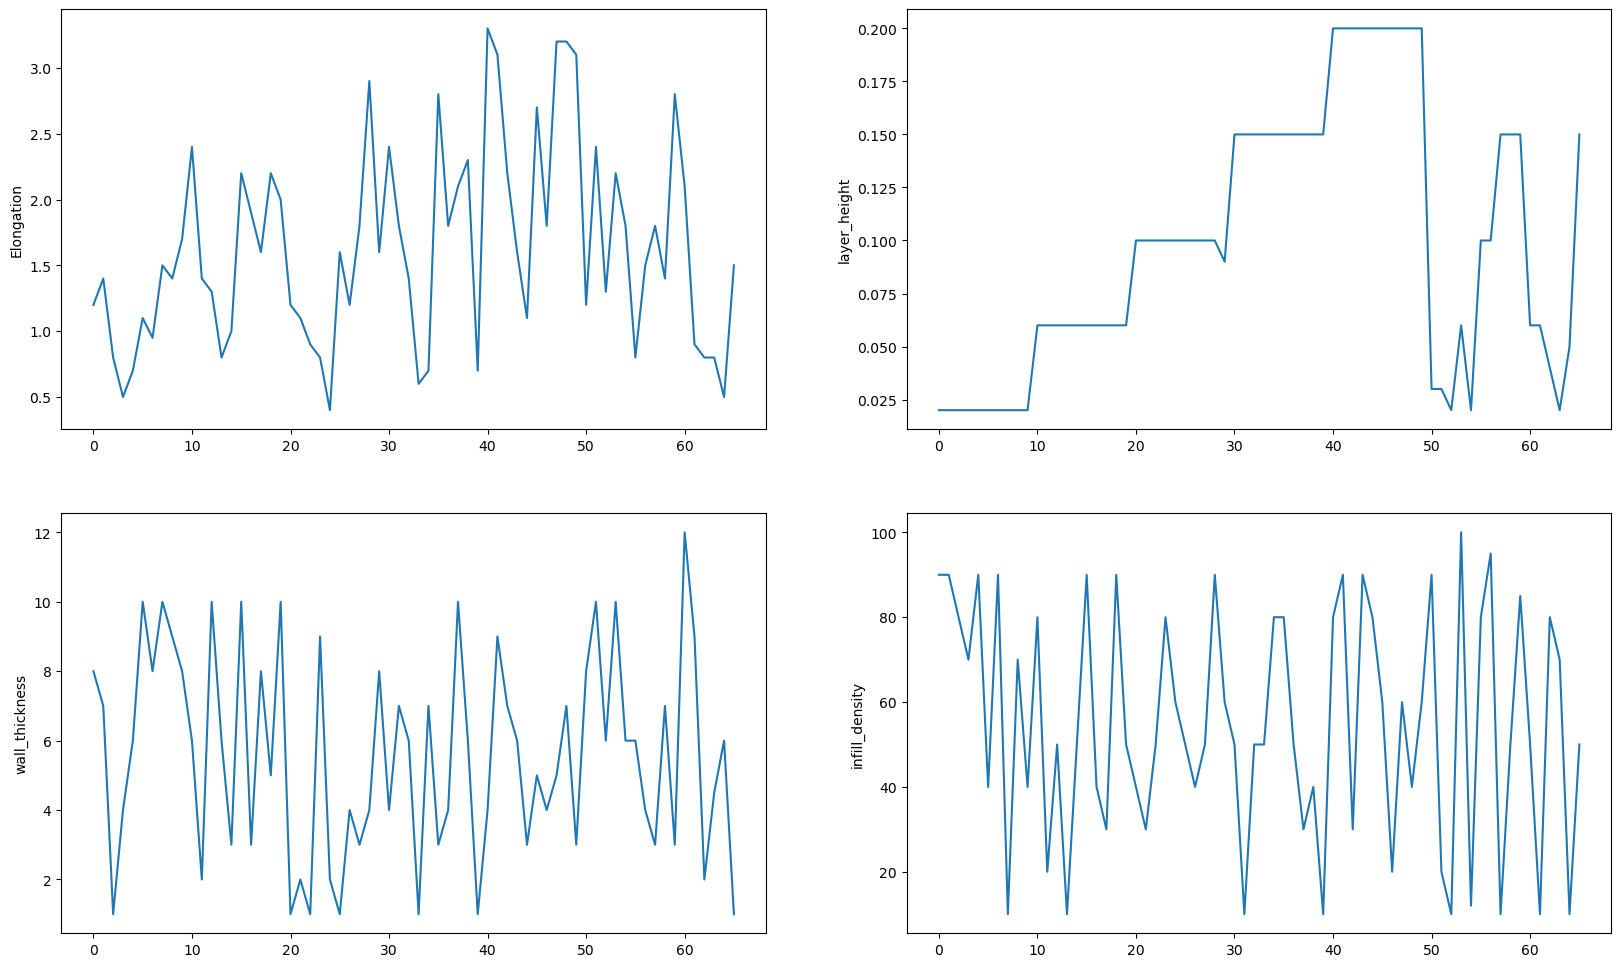

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data=df,x=df.index,y='Elongation')
plt.subplot(2,2,2)
sns.lineplot(data=df,x=df.index,y='layer_height')
plt.subplot(2,2,3)
sns.lineplot(data=df,x=df.index,y='wall_thickness')
plt.subplot(2,2,4)
sns.lineplot(data=df,x=df.index,y='infill_density')

<Axes: ylabel='Fan_speed'>

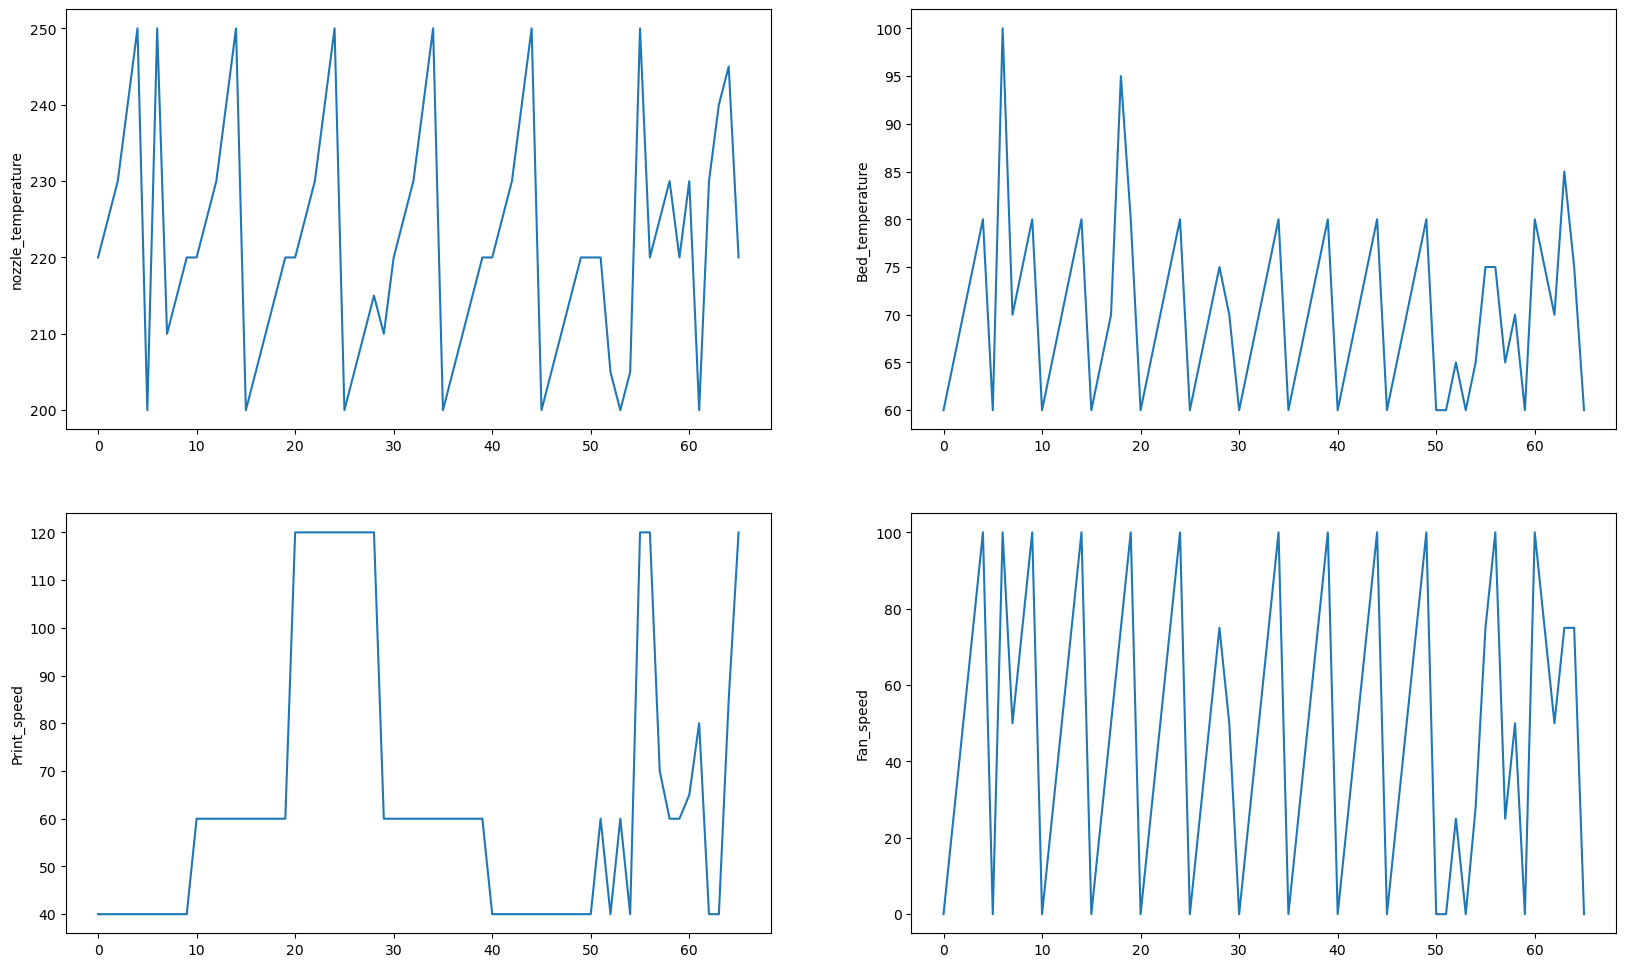

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data=df,x=df.index,y='nozzle_temperature')
plt.subplot(2,2,2)
sns.lineplot(data=df,x=df.index,y='Bed_temperature')
plt.subplot(2,2,3)
sns.lineplot(data=df,x=df.index,y='Print_speed')
plt.subplot(2,2,4)
sns.lineplot(data=df,x=df.index,y='Fan_speed')

<Axes: ylabel='Tension_strenght'>

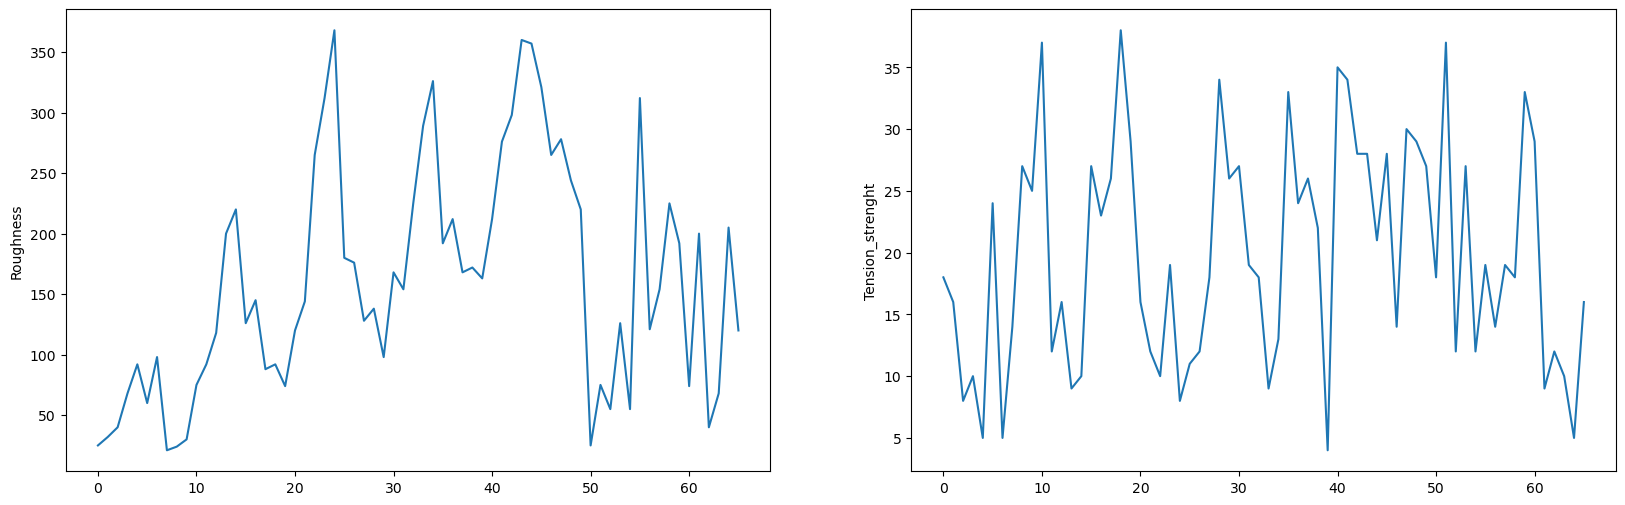

In [14]:

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.index,y='Roughness')
plt.subplot(1,2,2)
sns.lineplot(data=df,x=df.index,y='Tension_strenght')


<Axes: ylabel='Material'>

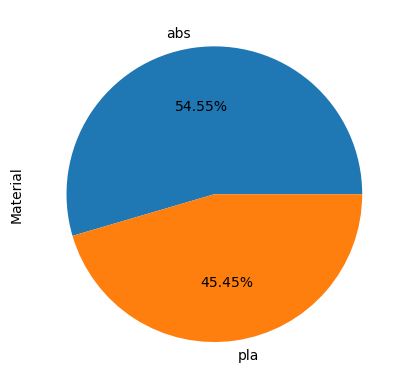

In [15]:
df['Material'].value_counts().plot.pie(autopct='%1.2f%%')

array([[<Axes: title={'center': 'layer_height'}>,
        <Axes: title={'center': 'wall_thickness'}>,
        <Axes: title={'center': 'infill_density'}>],
       [<Axes: title={'center': 'nozzle_temperature'}>,
        <Axes: title={'center': 'Bed_temperature'}>,
        <Axes: title={'center': 'Print_speed'}>],
       [<Axes: title={'center': 'Fan_speed'}>,
        <Axes: title={'center': 'Roughness'}>,
        <Axes: title={'center': 'Tension_strenght'}>],
       [<Axes: title={'center': 'Elongation'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2000x1200 with 0 Axes>

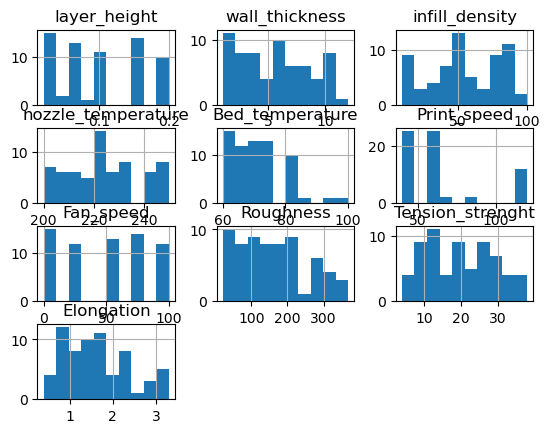

In [16]:
plt.figure(figsize=(20,12))
df.hist()

In [17]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,layer_height,wall_thickness,infill_density,nozzle_temperature,Bed_temperature,Print_speed,Fan_speed,Roughness,Tension_strenght,Elongation
layer_height,1.000000,-0.282933,-0.013763,-0.030562,-0.120838,0.044329,-0.040571,0.773096,0.325276,0.482438
wall_thickness,-0.282933,1.000000,0.025534,-0.130299,0.061974,-0.341273,0.050462,-0.240834,0.336492,0.150234
infill_density,-0.013763,0.025534,1.000000,0.213167,0.119221,-0.048114,0.035763,0.037378,0.278869,0.118003
nozzle_temperature,-0.030562,-0.130299,0.213167,1.000000,0.552889,0.031671,0.580967,0.302494,-0.392501,-0.524996
Bed_temperature,-0.120838,0.061974,0.119221,0.552889,1.000000,-0.067218,0.906690,0.106675,-0.247139,-0.310455
Print_speed,0.044329,-0.341273,-0.048114,0.031671,-0.067218,1.000000,-0.000353,0.212711,-0.195963,-0.213770
Fan_speed,-0.040571,0.050462,0.035763,0.580967,0.906690,-0.000353,1.000000,0.202488,-0.299644,-0.347389
Roughness,0.773096,-0.240834,0.037378,0.302494,0.106675,0.212711,0.202488,1.000000,0.038829,0.073683
Tension_strenght,0.325276,0.336492,0.278869,-0.392501,-0.247139,-0.195963,-0.299644,0.038829,1.000000,0.834834
Elongation,0.482438,0.150234,0.118003,-0.524996,-0.310455,-0.213770,-0.347389,0.073683,0.834834,1.000000


/tmp/ipykernel_20/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

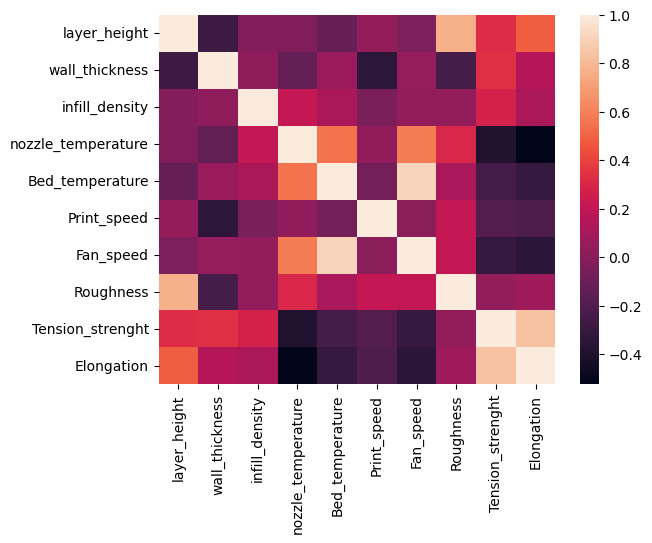

In [18]:
sns.heatmap(df.corr())

/tmp/ipykernel_20/2179091525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


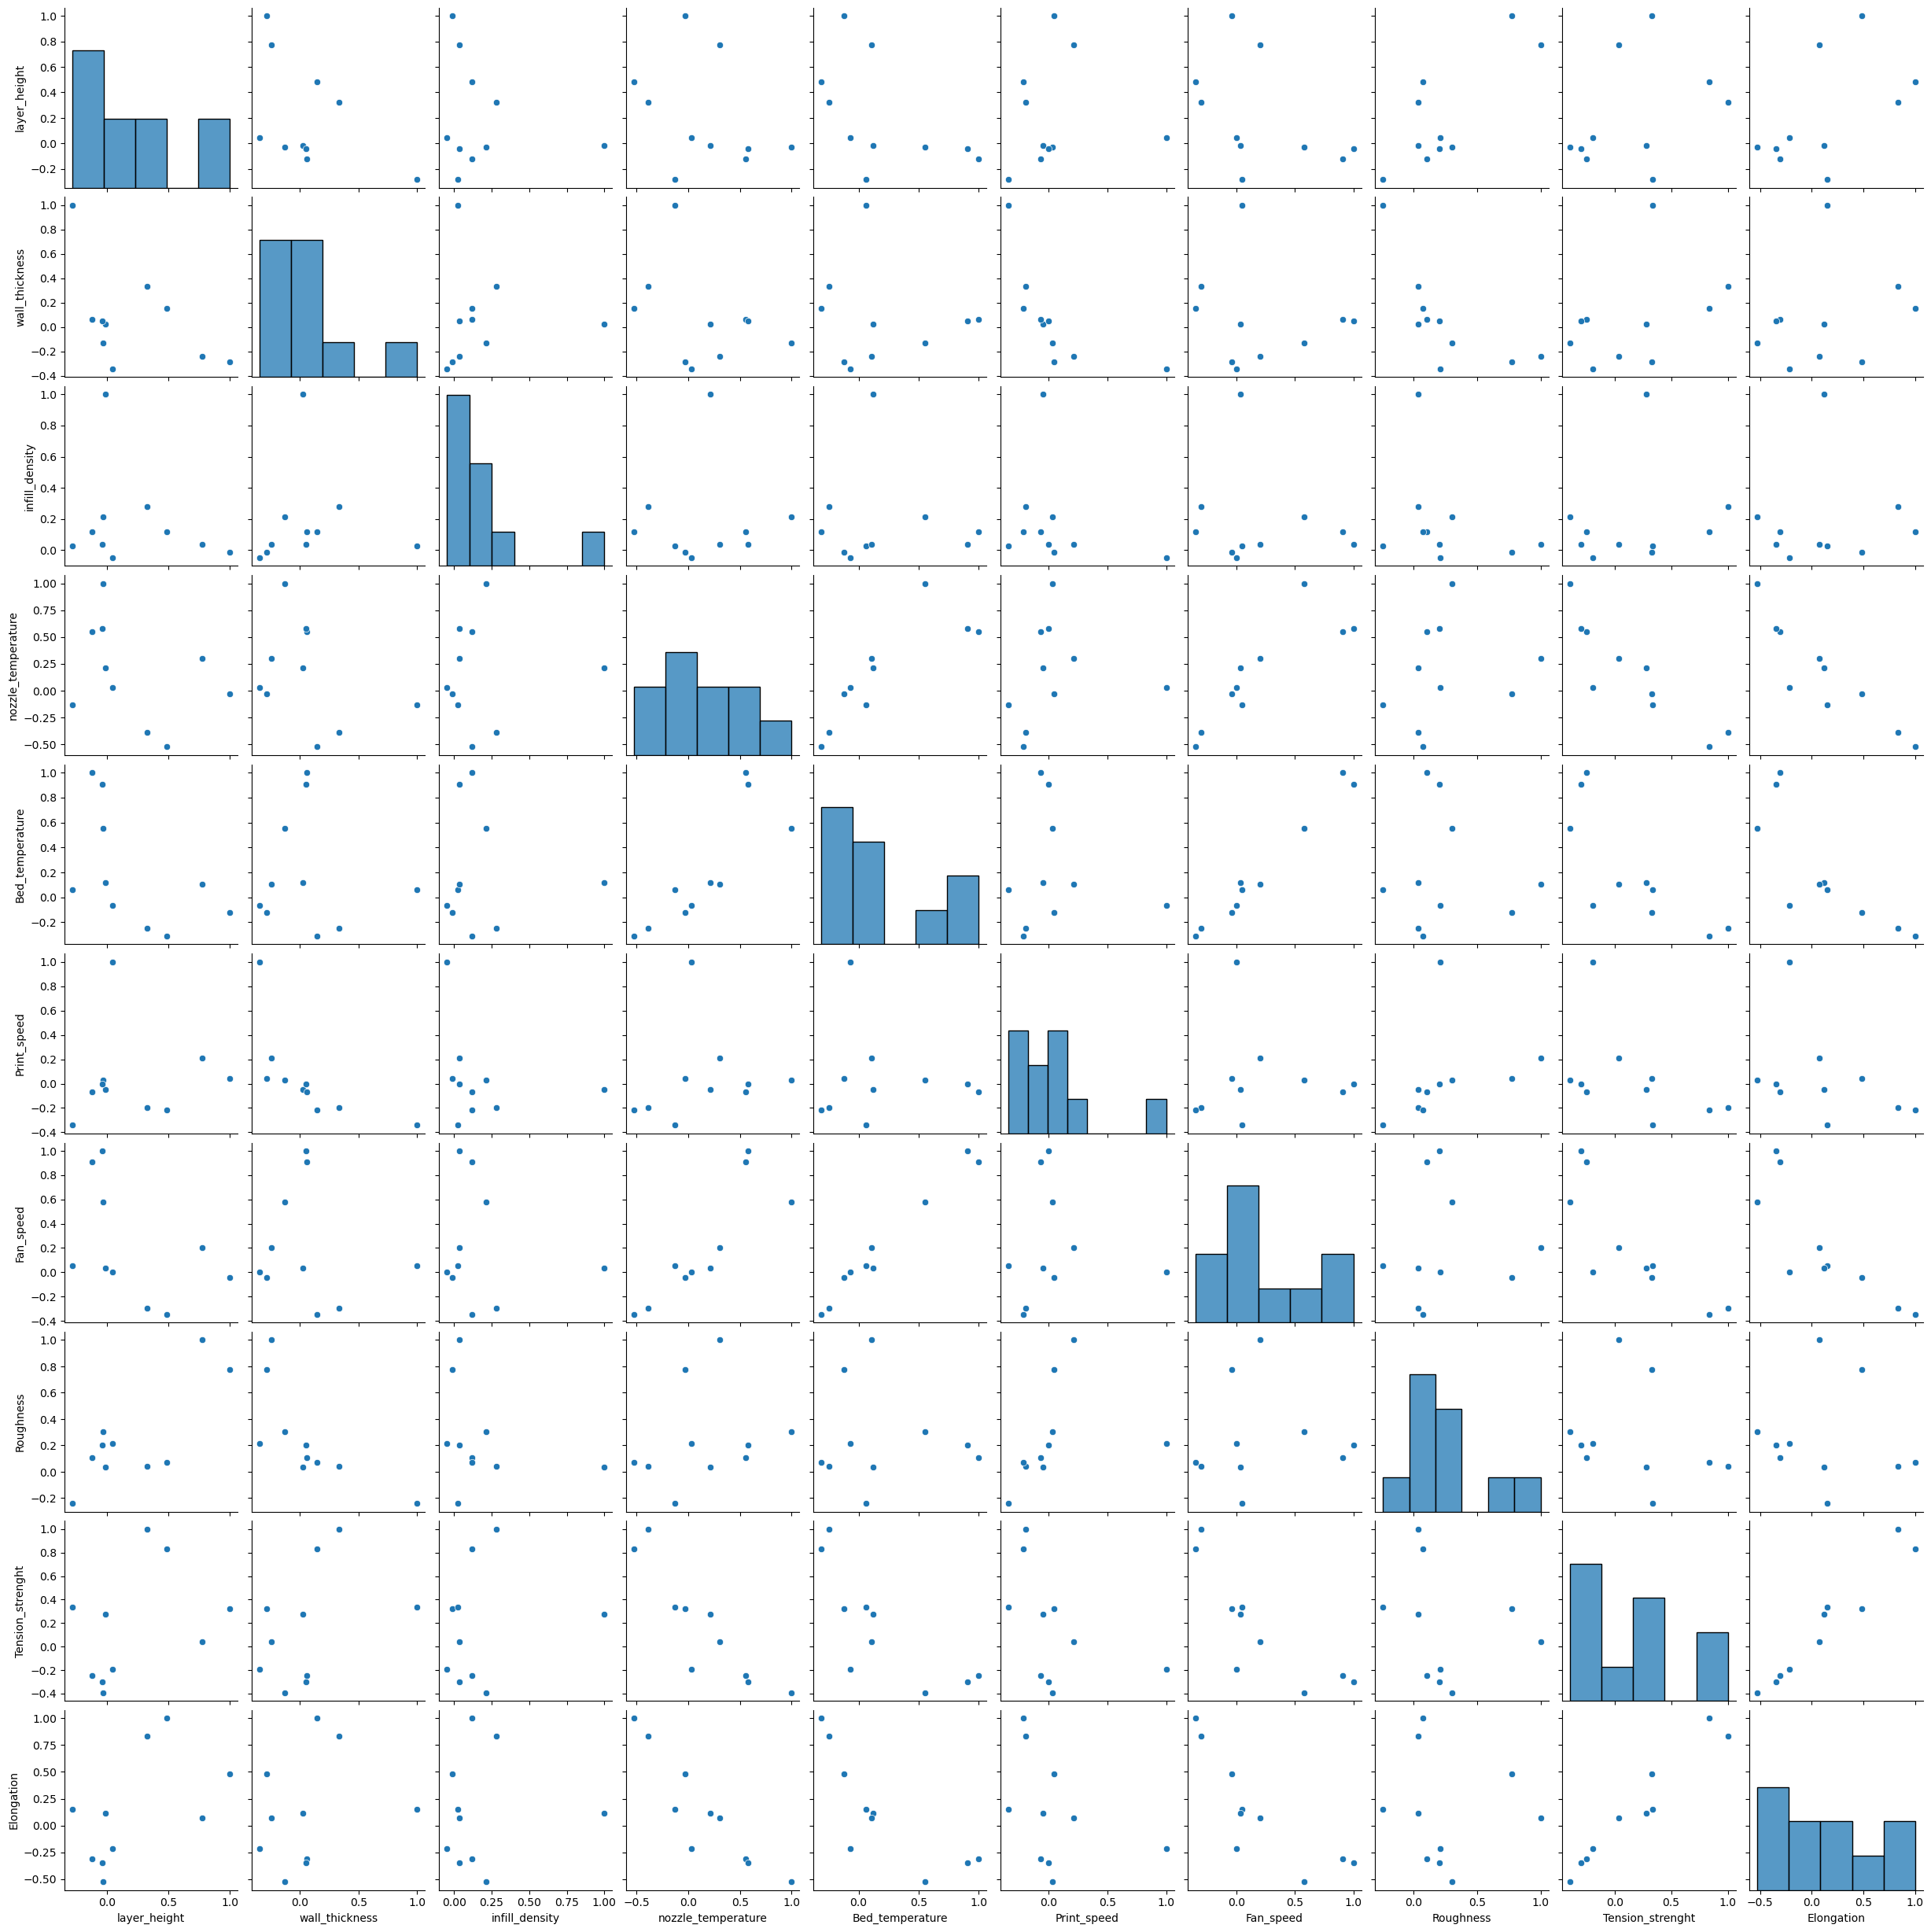

In [19]:
sns.pairplot(df.corr())

In [20]:
Y = df.iloc[:,7]
Y.head()

0    abs
1    abs
2    abs
3    abs
4    abs
Name: Material, dtype: object

In [21]:
X = df.iloc[:,list(range(7))+list(range(8,12))]
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,grid,220,60,40,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,100,92,5,0.7


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
X['infill_pattern'] = le.fit_transform(X['infill_pattern'])

/tmp/ipykernel_20/4125088603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['infill_pattern'] = le.fit_transform(X['infill_pattern'])


In [24]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,0,220,60,40,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,100,92,5,0.7


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
X_train.shape,Y_train.shape

((52, 11), (52,))

# SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [29]:
y_pred = svm.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = accuracy_score(Y_test,y_pred)

In [32]:
print("Accuracy : ",acc)

Accuracy :  0.42857142857142855


## here we not split the train and test dataset but use entire dataset for training 

In [33]:
svm1 = SVC()
svm1.fit(X,Y)
y_pred1 = svm1.predict(X)

In [34]:
print("Accuracy Score : ",accuracy_score(y_pred1,Y))

Accuracy Score :  0.7121212121212122


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(X_train,Y_train)
# y_pred = lr.predict(X_test)
# print("Accuracy for Logistic Regression : ",accuracy_score(Y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)
print("Accuracy for Logistic Regression : ",accuracy_score(Y_test,y_pred))

Accuracy for Logistic Regression :  0.7857142857142857


In [38]:
lr.fit(X,Y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = lr.predict(X)
print("Accuracy for Logistic Regression : ",accuracy_score(Y,y_pred))

Accuracy for Logistic Regression :  0.8636363636363636


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)


DecisionTreeClassifier()

In [41]:
predictions = dt.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy Score for Decision Tree :" ,accuracy)

Accuracy Score for Decision Tree : 0.9285714285714286


In [42]:
dt.fit(X,Y)

DecisionTreeClassifier()

In [43]:
predictions = dt.predict(X)
accuracy = accuracy_score(Y, predictions)
print("Accuracy Score for Decision Tree :" ,accuracy)

Accuracy Score for Decision Tree : 1.0


# GridSearchCV

## SVM

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [46]:
svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [47]:
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,Y_test))

Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Train Score: 0.96
Test Score: 1.0


## Decision Tree

In [48]:
param_grid = {'max_features': [ 'sqrt'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt']},
             verbose=True)

In [49]:
print("Best Parameters : ",grid_search.best_params_)
print("Train Score : ",grid_search.best_score_)
print("Test Score : ",grid_search.score(X_test,Y_test))

Best Parameters :  {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Train Score :  0.7727272727272727
Test Score :  0.9285714285714286
